Twitter data has been used to analyze historical events, in the Western world for quite some time.  For example, many papers have published models predicting the outcome of the 2016 U.S. election based on twitter sentiment data.  Additionally, twitter sentiment data is used by many companies to gage the successof their products and company and can aid in marketing analysis.  

Since October 2020, farmers in India have been protesting three farm acts that have been passed in India in September 2020. Farmers have taken to the streets of Dehli, where they have been camped out for the past 4 months (As of January 29 2021).  To read more about the protests:
[https://en.wikipedia.org/wiki/2020%E2%80%932021_Indian_farmers%27_protest]


There has been an influx of fake news across India that seeks to discredit the farmers in order to destabilize their movement. On January 26 2021 a tractor rally on India's Republic day led to the shooting of a farmer and many anti-farmer/progoverment/hindu nationalists have blamed farmers and protestors for the violence and escalation.  

What I wanted to do is explore the sentiments/ shift in sentiment towards the farmers for the past 10 days (as of January 20 2021), and explore if overall support for farmers had indeed decreased.  


What I would also like to do is build a timeline which correlates sentiment towards the farmers using twitter data, and keep updating it as the events unfold.   

Due to the nature of most social media algorithms, people tend to only view opinions that align with their own.  Doing an overall analysis could allow us to see the shifts in sentiment overall, as a result of historical events, as well as manipulated news media.

Methodology:
twitter data was scraped, using the query: 'farmer' from January 20-2021 to January 28-2021.


*future renditions of this analysis will include: location, likes, retweets, and follower counts, as well as an updated timeline.*

*updated queries will also be made to include word such as kisan, kisaan, and other common words associated with the protests*

*a corpus of tweets will also be used to train the data for a more accurate sentiment analysis*

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from wordcloud import WordCloud
from textblob import TextBlob



warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


In [2]:
combi = pd.read_csv('train.csv', index_col = False, names = ['date', 'tweet'])

In the next chunk of code I preprocess tweets - convert date to datetime, length of tweet, and add the sentiment option, also it's important to note that I did sentiment analysis using textblob on the raw tweet.  Textblob is a commonly used sentiment analyzer, however because of the nature that these tweets are written, it may be inaccurate

In [3]:
#PREPROCESSING

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("Red Fort", "redfort")

#combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[#]", " ")
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())


#at this point your would stem but i haven't on my dataset yet
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

#ADDING DATETIMES
combi['date'] = pd.to_datetime(combi['date'])

combi['Month'] = combi['date'].apply(lambda time: time.month)
combi['Day of Week'] = combi['date'].apply(lambda time: time.dayofweek)
combi['day of the month'] = combi['date'].dt.day
combi['Hour'] = combi['date'].apply(lambda time: time.hour)


dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

combi['Day of Week'] = combi['Day of Week'].map(dmap)

#ADDING TWEET LENGTH
combi['length'] = combi['tweet'].apply(len)

#ADDING SENTIMENT
#THIS CHUNK OF CODE WAS ADAPTED FROM: 
#https://github.com/himanshun3/Twitter-Sentiment-Analysis-and-Visualization/blob/master/.ipynb_checkpoints/Twitter_Sentimental_Analysis_HeatMaps-checkpoint.ipynb

combi['Sentiment'] = 0

def percentage(part,whole):
    return 100*float(part)/float(whole)

noofTerms=combi.shape[0]
positive=0
negative=0
neutral=0
polarity=0

for i,tweet in enumerate(combi['tweet']):
    analysis=TextBlob(tweet)
    polarity+=analysis.sentiment.polarity
    if(analysis.sentiment.polarity==0.0):
        neutral+=1
    elif(analysis.sentiment.polarity>0.00):
        positive+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1

    if(analysis.sentiment.polarity==0.0):
        combi['Sentiment'][i]=1
    elif(analysis.sentiment.polarity>0.0):
        combi['Sentiment'][i]=2
    elif(analysis.sentiment.polarity<0.0):
        combi['Sentiment'][i]=0
        
        
#Calculating the percentage of all the positive,negative and neutral terms

positive=percentage(positive,noofTerms)
negative=percentage(negative,noofTerms)
neutral=percentage(neutral,noofTerms)


positive=format(positive, '.2f')
negative=format(negative, '.2f')
neutral=format(neutral, '.2f')


<ipython-input-3-d103c8c7bc93>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combi['Sentiment'][i]=0
<ipython-input-3-d103c8c7bc93>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combi['Sentiment'][i]=1
<ipython-input-3-d103c8c7bc93>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combi['Sentiment'][i]=2


In [4]:
combi.head()

,date,tweet,tidy_tweet,Month,Day of Week,day of the month,Hour,length,Sentiment
0,2021-01-26 23:59:56,"b""@IwriteOK That's gotta be one mad cow farmer.""",that gotta farmer,1,Tue,26,23,48,0
1,2021-01-26 23:59:53,b'RT @OpIndia_com: Rajdeep Sardesai lies twice...,rajdeep sardesai lie twice say farmer kill bec...,1,Tue,26,23,177,0
2,2021-01-26 23:59:51,b'RT @Manpreets50: I request to retweet it ple...,request retweet pleas everyon pleas keep sprea...,1,Tue,26,23,155,1
3,2021-01-26 23:59:46,"b'RT @kawalpreetdu: Navneet Singh, 34 year old...",navneet singh year #farmer protest from uttara...,1,Tue,26,23,158,0
4,2021-01-26 23:59:45,b'RT @OpIndia_com: As the anti-farm law protes...,anti farm protestor sieg nation capit republ c...,1,Tue,26,23,154,2


Moving on to visualization, I will start with word clouds - looking at overall wordcloud, positive sentiment word cloud and negative sentiment wordcloud

I will also look at overall positive hashtags and overall negative hashtags

*In the next section I will breakdown sentiment and top 10 hashtags by date, and look at them in that way, and then also by hour throughout the day*

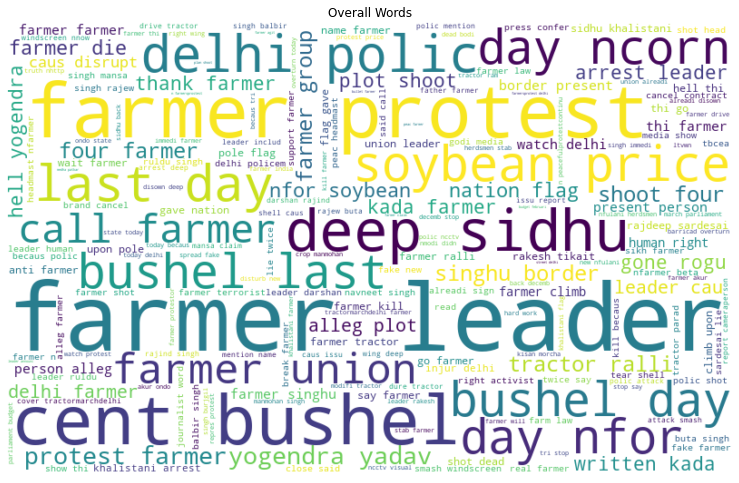

In [5]:
all_words = ' '.join([text for text in combi['tidy_tweet']])


wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)
plt.figure(figsize=(13, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Overall Words')
plt.show()


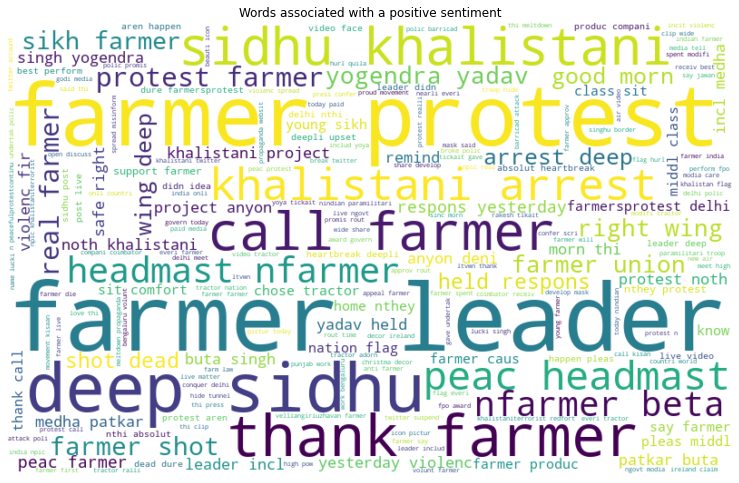

In [6]:
positive_words =' '.join([text for text in combi['tidy_tweet'][combi['Sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(positive_words)
plt.figure(figsize=(13, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Words associated with a positive sentiment')
plt.show()

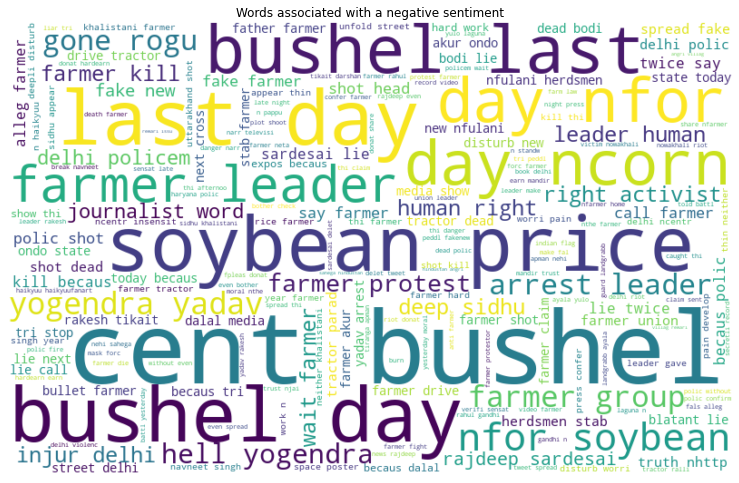

In [7]:
neg_words =' '.join([text for text in combi['tidy_tweet'][combi['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(neg_words)
plt.figure(figsize=(13, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Words associated with a negative sentiment')
plt.show()

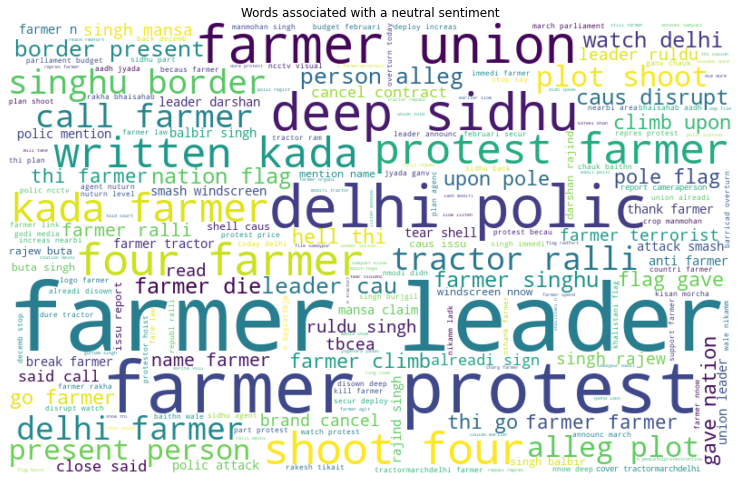

In [8]:
neutral_words =' '.join([text for text in combi['tidy_tweet'][combi['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(neutral_words)
plt.figure(figsize=(13, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Words associated with a neutral sentiment')
plt.show()


While all of this text looks similar based on sentiment.  First off, the TextBlob sentiment analysis in inaccurate for the context of this dataset.  I'll extract the hashtags associated with the sentments, but my feeling is that a seperate corpus will need to be made.   We see a major flaw in the sentiment analysis already with one of the most common phrases associated with a positive sentiment is "khalistani arrest" and "farmer terrorist appearing in the neutal group   

I'll also continue and explore the sentiment and hashtags by day, and it can further validate the need for a seperate corpus.  For those unaware, the sentiment towards the farmers radically shifted on tuesday january 26 2021, due a tractor rally held in New Dehli going awry.  If the overall sentiment on the 26th remains the same (no increase in negative sentiment) I'll stop there and build the corpus. 

Moving on, its now time to extract hashtags

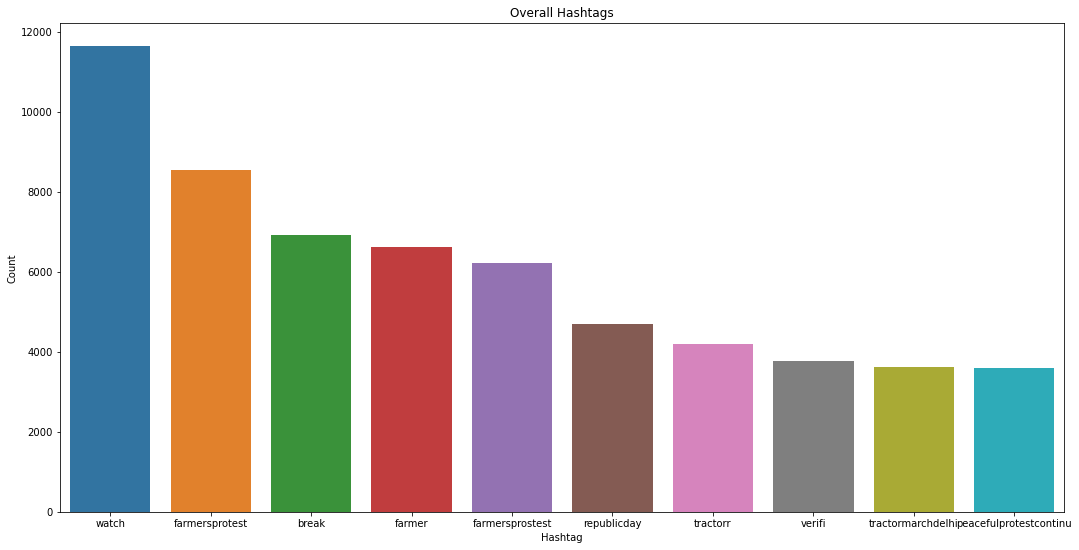

In [9]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

HT_regular = hashtag_extract(combi['tidy_tweet'])

HT_regular = sum(HT_regular,[])

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(18,9))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Overall Hashtags')
plt.show()

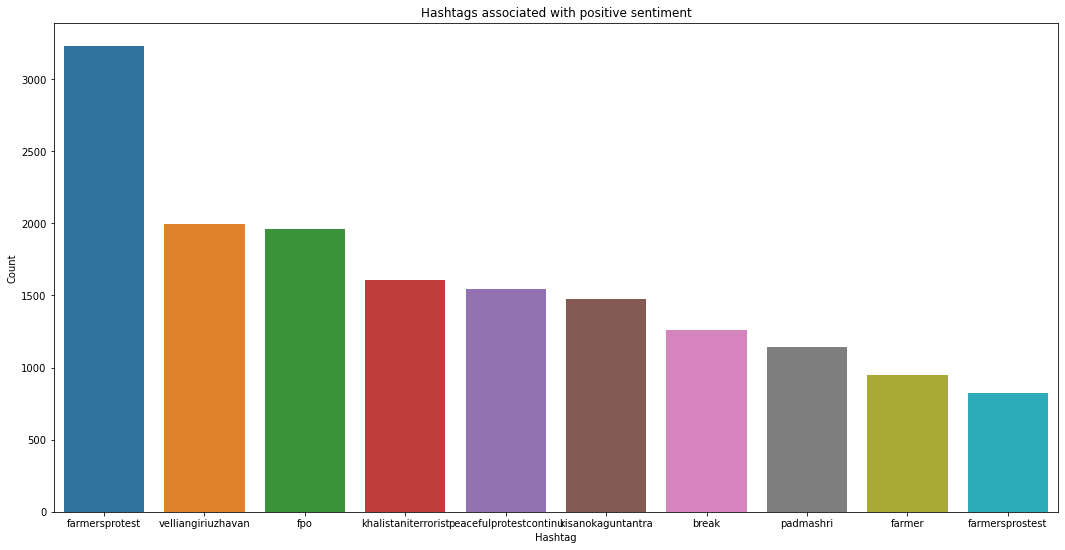

In [11]:
HT_positive = hashtag_extract(combi['tidy_tweet'][combi['Sentiment'] == 2])

HT_positive = sum(HT_positive,[])

a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(18,9))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Hashtags associated with positive sentiment')
plt.show()

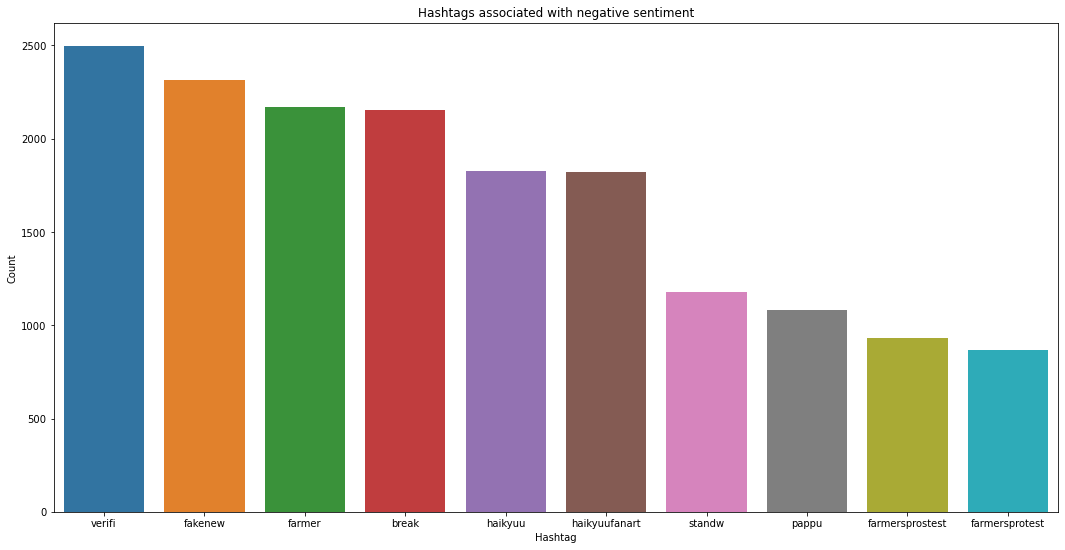

In [12]:
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['Sentiment'] == 0])

HT_negative = sum(HT_negative,[])

a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(18,9))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Hashtags associated with negative sentiment')
plt.show()

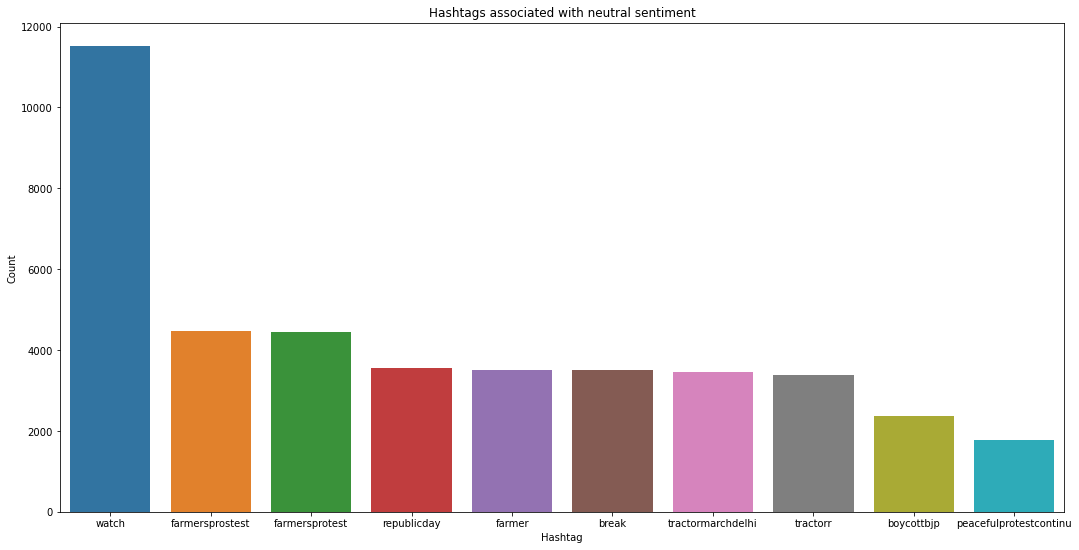

In [13]:
HT_neutral = hashtag_extract(combi['tidy_tweet'][combi['Sentiment'] == 1])

HT_neutral = sum(HT_neutral,[])

a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(18,9))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Hashtags associated with neutral sentiment')
plt.show()

Yup '#khalistaniterrorist' should not be associated with a positive sentiment

Text(0.5, 1.0, 'Average sentiment across day of the month')

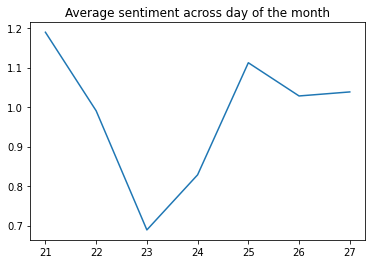

In [29]:
plt.plot(combi.groupby('day of the month')['Sentiment'].mean())
plt.title('Average sentiment across day of the month')

This is quite interesting to see, according to the textblob, on January 23rd, sentiment actually decreased for the farmers.  According to Wikipedia the following had happened:


SKM volunteers detain a man who confesses in front of the media cameras that he is member of a team of assassins, and agent provocateurs, whose mission is to disrupt the farmer rally, assassinate four farmer's leaders and cause a firefight between the farmers and the police on 26 January. He says that the police planned to recruit and arm a 'team' of ten, including two women, to infiltrate the movement to serve as agent provocateurs and potential assassins. Part of the team was to undercover dressed in jeans and turbans, while a different portion appeared in police uniforms. Kulwant Singh Sandhu alleged that "Attempts are being made by agencies to disrupt the farmers' agitation."[

On January 23, the man in the police custody claimed that he was beaten by some of the protesting farmers who also forced him to drink alcohol and coerced him to give a false statement to the media during the press conference or he will be killed.

Delhi Police accords permission, with several conditions, to the farmers to hold their republic Day parade in Delhi. Farmer leader Darshan Pal says the barricades and barriers that Delhi Police had placed between the farmers and Delhi, will be removed by the police before January 26, 2021. Similar parades will be held in all villages, and districts of India.


It'll be interesting to see if this pattern holds up while using the more updated corpus.

Text(0.5, 1.0, 'Average sentiment across the day UTC time as a whole')

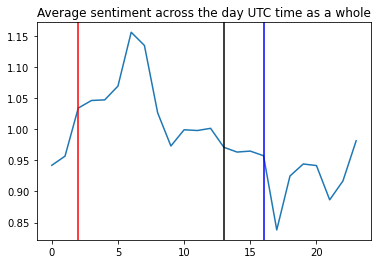

In [51]:
plt.plot(combi.groupby('Hour')['Sentiment'].mean())


xcoords = [2,13,16]
colors = ['r','k','b']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)


plt.title('Average sentiment across the day UTC time as a whole')

So I decided to do the above analysis to explore how timezones may play a role on te overall sentiment throughout the day.  While I plan on using location data in the future, manytimes, people have their location disabled and we lose some of that information.  To get around this I've taken the hour data and hopefully it can give insight into when people from different parts of the world feel with regards to the protests.  Tweepy timestamps the tweets in UTC timing, meaning we don't need to transform any of the time stamped variables.  

In North America, much of the Indian diaspora have been showing their support for farmers, however much of the news that goes on throughout the day they aren't aware of until their morning.  The three lines above show, 8 am IST, 8 am EST and 8 am PST.

Whats interesting is that overall sentiment towards farmers peaks at 5:00 UTC.  It's around midnight in  EST, and around 9 pm PST, and 10:30 a.m in India.

There are two scenarios that could be happening looking at this graph but we'll break it into timezones so its easier to visualize.
Scenario 1:
First we have India 8:30 am in red, and 8:30 pm in blue:

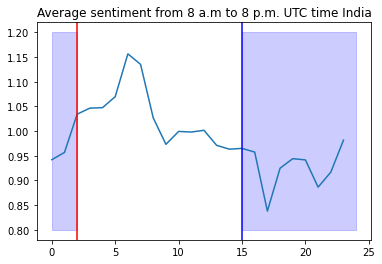

In [65]:
plt.plot(combi.groupby('Hour')['Sentiment'].mean())

night = [15, 24]
night1=[0,2]
xcoords = [2,15]
colors = ['r','b']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)


plt.title('Average sentiment from 8 a.m to 8 p.m. UTC time India')

plt.fill_between(night, 0.8, 1.2,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

plt.fill_between(night1, 0.8, 1.2,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill


Sentiments towards the farmers are fairly positive throughout the day, but as people turn on their evening news, they tend to have more negative sentiments

Scenario 2:

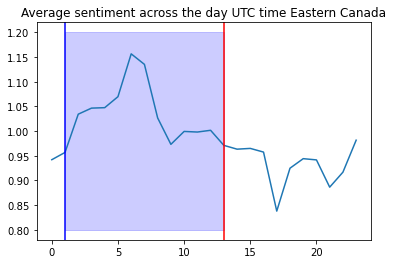

In [61]:
plt.plot(combi.groupby('Hour')['Sentiment'].mean())


xcoords = [13,1]
colors = ['r','b']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)


plt.title('Average sentiment across the day UTC time Eastern Canada')


plt.fill_between(xcoords, 0.8, 1.2,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

If diaspora were to have an influence on the sentiment towards the farmers, we would assume that the sentiment would go up during the morning, when they first hear the latest news from india.  They could a-either be tweeting positive things about the farmers at later times past the evening, but for the most part we see tha the sentiment does drop, until past 8 pm EST.  A similar story is found with the PST timings.  Looking at location could allow us to explore these findings further

Its important to remember that this data is only span of a week, when looking at the distribution of number of tweets, we can see an overwhelming number of tweets take place on the 26th and 27th of January (the day of the Tractor rally and India's Republic Day).

(array([ 17892.,  47394.,  61203.,  36743.,  28534., 244419., 163354.]),
 array([21.        , 21.85714286, 22.71428571, 23.57142857, 24.42857143,
        25.28571429, 26.14285714, 27.        ]),
 <a list of 7 Patch objects>)

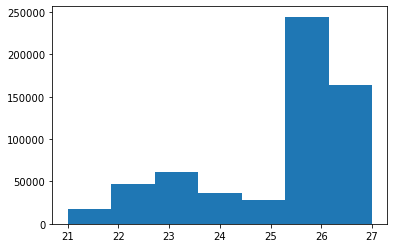

In [79]:
plt.hist(combi['day of the month'], bins = 7, histtype='bar')